# APS2 - APLICAÇÃO DO MÉTODDO DAS DIERENÇAS FINITAS

## QUESTÃO 1

<img src="q1.jpeg">

In [1]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt


## Questão 2

In [2]:
# dados do problema
tol = 1e-10
l = 300e-3  # m
D = 5e-3   # m
densidade = 2700  # kg/m^3
k = 180  # w/(mK)
Tl = 25  # ºC
Tb = 100  # ºC
Tinf = 50  # ºC
h = 50  # W/m^2K
Cp = 896  # J/kgK


In [3]:
# estimando o dx para ter o dt dentro no intervalo permitido
dx = 1e-2  # m
alpha = np.divide(k, np.multiply(densidade, Cp))
raio = np.divide(D, 2)
perimetro = np.multiply(2, np.pi*raio)
Atr = np.multiply(np.pi, np.power(raio, 2))
dt = np.divide(np.power(dx, 2)*0.9, alpha *
               (np.divide(h*perimetro*np.power(dx, 2), k*Atr)+2))

print(f'dt = {dt} s e dx = {dx} m')


dt = 0.5981538461538461 s e dx = 0.01 m


In [4]:
# criando a matriz de temperaturas
t_max = 1000  # s
passos_t = int(t_max/dt) + 1
passos_x = int(l/dx) + 1

print(f'passos_t = {passos_t} e passos_x = {passos_x}')

matrix_temp = np.zeros(shape=(passos_t, passos_x))
matrix_temp[:, :] = Tinf
matrix_temp[:, 0] = Tb
matrix_temp[:, -1] = Tl
matrix_temp


passos_t = 1672 e passos_x = 31


array([[100.,  50.,  50., ...,  50.,  50.,  25.],
       [100.,  50.,  50., ...,  50.,  50.,  25.],
       [100.,  50.,  50., ...,  50.,  50.,  25.],
       ...,
       [100.,  50.,  50., ...,  50.,  50.,  25.],
       [100.,  50.,  50., ...,  50.,  50.,  25.],
       [100.,  50.,  50., ...,  50.,  50.,  25.]])

In [5]:
const = alpha*dt
const2 = np.divide(h*perimetro, np.multiply(k, Atr))
lis_erro_abs = []
for t in range(passos_t - 1):
    lis_aux = []
    for i in range(1, passos_x - 1):
        matrix_temp[t+1, i] = matrix_temp[t, i] + np.multiply(const, np.divide(
            (matrix_temp[t, i+1] - 2*matrix_temp[t, i] + matrix_temp[t, i-1]), np.power(dx, 2)) - const2*(matrix_temp[t, i] - Tinf))
        # calculando o erro absoluto da linha e retornar o maximo
        lis_aux.append(
            abs(np.divide(matrix_temp[t+1, i] - matrix_temp[t, i], matrix_temp[t+1, i])))
    erro_max = max(lis_aux)
    lis_erro_abs.append(erro_max)


In [6]:
matrix_temp[2]

array([100.        ,  74.47802198,  59.90369521,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        50.        ,  50.        ,  50.        ,  50.        ,
        45.0481524 ,  37.76098901,  25.        ])

In [7]:
# calculando o erro máximo
erro_max = lis_erro_abs[-1]
print(f'Erro máximo = {erro_max}')


Erro máximo = 2.4433725272457248e-14


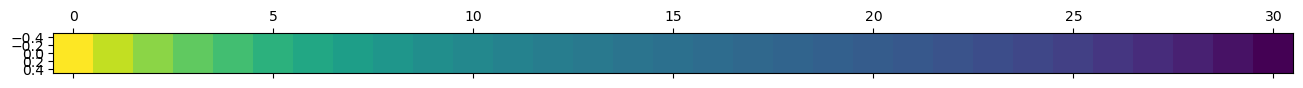

In [8]:
plt.matshow(matrix_temp[-1:])


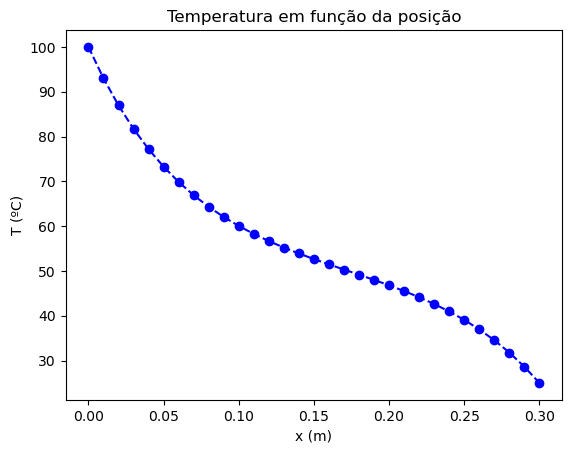

In [9]:
lis = matrix_temp[-1, :]
lis_x_plot = np.arange(0, l+dx, dx)
plt.title("Temperatura em função da posição")
plt.xlabel("x (m)")
plt.ylabel("T (ºC)")
plt.plot(lis_x_plot, lis, "b--o")


## Questão 3


In [10]:
def calcula_m(h, P, k, A):
    return np.sqrt(np.divide(h*P, k*A))


def calcula_M(h, P, k, A, tb, t_inf):
    return np.sqrt(np.divide(h*P, k*A))*(tb-t_inf)


def distribuicao_temperatura_caso_a(m, L, x, h, k, tb, t_inf):
    numerador = np.cosh(m*(L-x)) + np.divide(h, m*k)*np.sinh(m*(L-x))
    denominador = np.cosh(m*L) + np.divide(h, m*k)*np.sinh(m*L)
    razao = np.divide(numerador, denominador)
    # comverter a temperatura
    return np.multiply(razao, (tb-t_inf)) + t_inf


def transferencia_calor_caso_a(M, m, L, h, k):
    numerador = np.sinh(m*L) + np.divide(h, m*k)*np.cosh(m*L)
    denominador = np.cosh(m*L) + np.divide(h, m*k)*np.sinh(m*L)
    return np.multiply(M, np.divide(numerador, denominador))


def distribuicao_temperatura_caso_c(m, L, x, tb, tl, tinf):
    numerador = np.divide(tl-tinf, tb-tinf)*np.sinh(m*x) + np.sinh(m*(L-x))
    denominador = np.sinh(m*L)
    razao = np.divide(numerador, denominador)
    return np.multiply(razao, (tb-tinf)) + tinf


In [11]:
m = calcula_m(h, perimetro, k, Atr)
lista_x = np.arange(0, l+dx, dx)
lista_t = []
for i in range(len(lista_x)):
    lista_t.append(distribuicao_temperatura_caso_c(m, l, lista_x[i], Tb, Tl, Tinf))


Text(0.5, 1.0, 'Distribuição de temperatura')

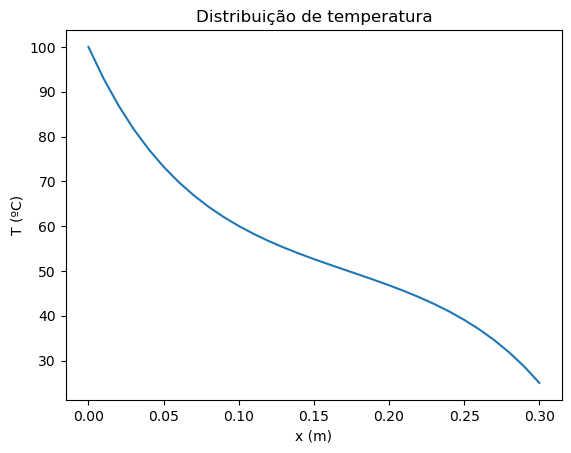

In [12]:
# plot dp grafico
plt.plot(lista_x,lista_t)
plt.xlabel('x (m)')
plt.ylabel('T (ºC)')
plt.title('Distribuição de temperatura')

## Comparando os gráficos

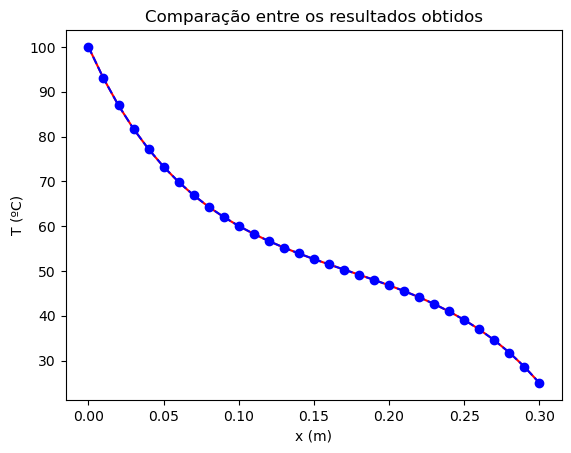

In [13]:
plt.plot(lista_x,lista_t, "r")
plt.plot(lis_x_plot, lis, "b--o")
plt.xlabel('x (m)')
plt.ylabel('T (ºC)')
plt.title('Comparação entre os resultados obtidos')
plt.show()